# ##############################################################
#                 Modélisation : TEST 2
# ##############################################################

In [16]:
import numpy as np
import pandas as pd

# pour afficher toutes les colonnes:
pd.options.display.max_columns = None

import matplotlib.pyplot as plt# Pie chart
import matplotlib.cm as cm

#nlp
from sklearn.feature_extraction.text import CountVectorizer

# modélisation
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# évaluation modèle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [158]:
#df_model = pd.read_csv("../dataset/data_modelisation.csv", sep=',')
#df_model = df_model.drop(['Unnamed: 0'], axis=1)
#df_model.head()

df = pd.read_csv("../dataset/data_gp.csv", sep=',', index_col='date')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)
#df_model.head()

,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre,reel,effectif,nos,ind,prevision,porc,viande,bio,poisson,noel,plat_prepare,laitage,an_chinois
date,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0,0,0,16047,0,0,0,0,0,0,0,10394,16047,16047,0,11319,0,16047,0,0,0,16047,0,0
2011-01-04,0,0,0,17373,0,0,0,0,0,0,0,11803,17373,0,0,12558,0,17373,0,0,0,17373,87,0
2011-01-06,0,0,0,17373,0,0,0,0,0,0,0,11777,17373,0,0,12753,17373,17373,87,0,0,0,0,0
2011-01-07,0,0,0,17373,0,0,0,0,0,0,0,12254,17373,0,0,12812,0,0,0,17373,0,0,87,0
2011-01-10,0,0,0,17373,0,0,0,0,0,0,0,11365,17373,0,0,12309,0,0,0,17373,0,17373,87,0


In [159]:
print(df.shape)
df.info()

(1061, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 1061 entries, 2011-01-03 to 2019-12-19
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Avril         1061 non-null   int64
 1   Decembre      1061 non-null   int64
 2   Fevrier       1061 non-null   int64
 3   Janvier       1061 non-null   int64
 4   Juillet       1061 non-null   int64
 5   Juin          1061 non-null   int64
 6   Mai           1061 non-null   int64
 7   Mars          1061 non-null   int64
 8   Novembre      1061 non-null   int64
 9   Octobre       1061 non-null   int64
 10  Septembre     1061 non-null   int64
 11  reel          1061 non-null   int64
 12  effectif      1061 non-null   int64
 13  nos           1061 non-null   int64
 14  ind           1061 non-null   int64
 15  prevision     1061 non-null   int64
 16  porc          1061 non-null   int64
 17  viande        1061 non-null   int64
 18  bio           1061 non-null   int64
 19  poisso

### Préparation à la modélisation

In [160]:
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

# suppression des variables citées dans le nb modélisation : test 1
train_data = df['2015-09':'2018-07']
X_train = train_data[['Avril', 'Decembre', 'Fevrier', 'Janvier', 'Mai', 'Mars', 'Novembre', 'Octobre', 'Septembre', 'effectif', 'viande', 'poisson', 'noel']]
#X_train = train_data.drop(['reel', 'effectif', 'porc', 'bio', 'plat_prepare', 'laitage', 'an_chinois'], axis=1)
y_train = train_data[['reel']]

test_data = df['2018-09':'2019-07']
X_test = test_data[['Avril', 'Decembre', 'Fevrier', 'Janvier', 'Mai', 'Mars', 'Novembre', 'Octobre', 'Septembre', 'effectif', 'viande', 'poisson', 'noel']]
#X_test = test_data.drop(['reel', 'effectif', 'porc', 'bio', 'plat_prepare', 'laitage', 'an_chinois'], axis=1)
y_test = test_data[['reel']]

#data = df_model.drop(['effectif'], axis=1)
#X = data['2015-09':'2020-07']
#y = X[['reel']]
print("X_train : ", X_train.shape,",", "X_test :", X_test.shape)

X_train :  (379, 13) , X_test : (127, 13)


### Modélisation : deuxième modèle avec un ajustement des variables

In [161]:
#On commence à entrainer le modèle à partir de l'année scolaire 2015-2016
#On test sur l'année 2018-2019

X_train = sm.add_constant(X_train, has_constant='add')
X_test = sm.add_constant(X_test, has_constant='add')

# construction du modèle de régression linéaire multiple de moindre carré ordinaire
mod = sm.OLS(y_train, X_train)

# lancement de l'entraînement
res = mod.fit()


print(res.summary())

#dfm = df_model

# prédiction du modèle
y_pred = res.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index).round(0).astype(int)

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     87.43
Date:                Tue, 29 Apr 2025   Prob (F-statistic):          1.79e-103
Time:                        15:49:46   Log-Likelihood:                -2733.0
No. Observations:                 379   AIC:                             5494.
Df Residuals:                     365   BIC:                             5549.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -249.9127    592.170     -0.422      0.6

In [162]:
# Coefficients
print("Coefficients:")
print(res.params)

# P-values
print("\nP-values:")
print(res.pvalues)

# Résidus
print("\nRésidus:")
print(res.resid)

# R2
print("\nR²:")
print(res.rsquared)

results_df = pd.DataFrame({
    'coef': res.params,
    'std_err': res.bse,
    't': res.tvalues,
    'P>|t|': res.pvalues
}).round(5)

results_df

Coefficients:
const       -249.912695
Avril          0.026880
Decembre       0.021227
Fevrier        0.012476
Janvier        0.019485
Mai            0.026289
Mars           0.019695
Novembre       0.026326
Octobre        0.025175
Septembre      0.013367
effectif       0.728700
viande        -0.033062
poisson        0.007974
noel           0.047858
dtype: float64

P-values:
const        6.732527e-01
Avril        2.360363e-10
Decembre     1.620749e-07
Fevrier      2.384360e-03
Janvier      7.329993e-08
Mai          4.450763e-11
Mars         7.372557e-08
Novembre     9.075182e-13
Octobre      1.565124e-09
Septembre    1.537408e-04
effectif     2.381527e-76
viande       5.581829e-24
poisson      1.645769e-02
noel         5.222848e-06
dtype: float64

Résidus:
date
2015-09-01   -826.981178
2015-09-03   -126.981178
2015-09-04    484.018822
2015-09-07   -222.981178
2015-09-08   -244.369221
                 ...    
2018-06-21    216.361554
2018-06-22    -61.487993
2018-06-25   -249.856843
2018-

,coef,std_err,t,P>|t|
const,-249.91269,592.17028,-0.42203,0.67325
Avril,0.02688,0.00412,6.51878,0.00000
Decembre,0.02123,0.00397,5.34207,0.00000
Fevrier,0.01248,0.00408,3.05906,0.00238
Janvier,0.01949,0.00355,5.49539,0.00000
Mai,0.02629,0.00387,6.79393,0.00000
Mars,0.01969,0.00358,5.49429,0.00000
Novembre,0.02633,0.00355,7.40637,0.00000
Octobre,0.02518,0.00406,6.19585,0.00000
Septembre,0.01337,0.00349,3.82505,0.00015


### Analyse des résultats

In [164]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² : {r2:.4f}")

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE : {rmse:.4f}")

R² : 0.6574
RMSE : 501.2283


### Visualisation des résultats

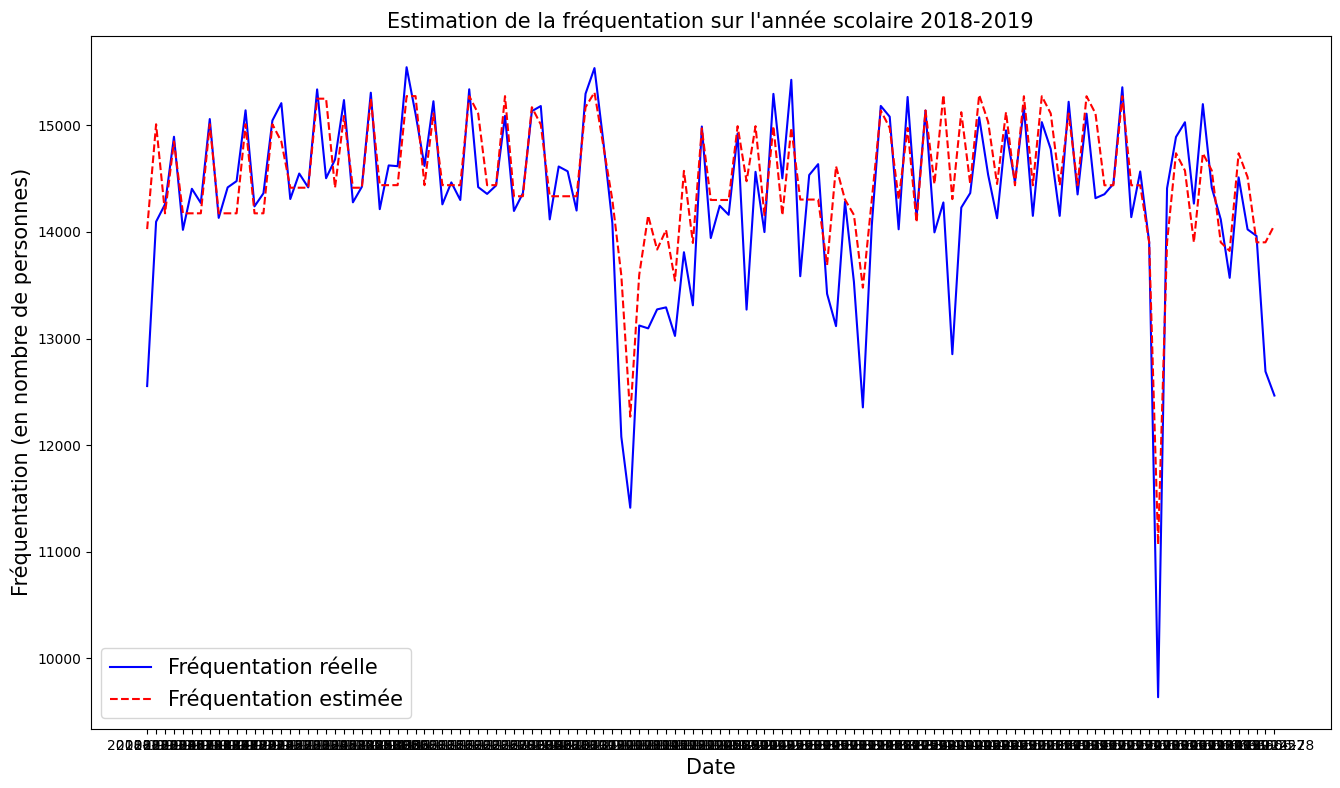

In [165]:
# Visualisation
plt.figure(figsize=(16,9))
plt.plot(y_test.index, y_test, label="Fréquentation réelle", color='blue')
plt.plot(y_pred.index, y_pred, label="Fréquentation estimée", color='red', linestyle='--')

plt.title("Estimation de la fréquentation sur l'année scolaire 2018-2019", fontsize=15)
plt.ylabel("Fréquentation (en nombre de personnes)", fontsize=15)
plt.xlabel("Date", fontsize=15)

plt.legend(fontsize=15)

Les prédictions sont trop justes, donc il faut calculer un paramètre alpha pour permettre d'ajuster les prévisions et d'éviter les jours de sous-production. Avoir des jours de sous-production conséquents n'est pas possible, car cela implique que des enfants ne mangent pas à la cantine.

### Ajuster les prédictions pour qu'il n'y ait pas de repas manquants pour les élèves

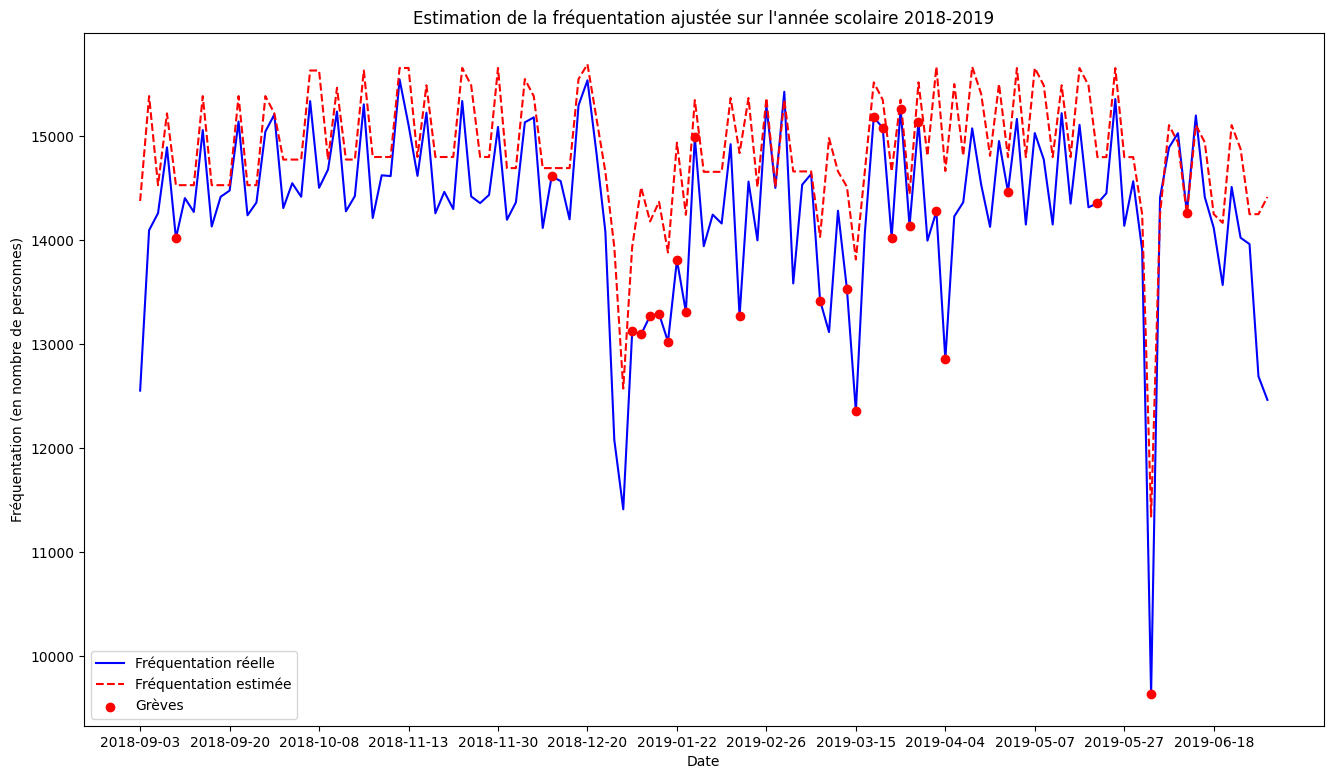

In [183]:
plt.figure(figsize=(16, 9))

# prédiction *(1+ alpha)
y_pred_ajust = y_pred*(1+0.025)


plt.plot(y_test.index, y_test, label="Fréquentation réelle", color='blue')
plt.plot(y_pred.index, y_pred_ajust, label="Fréquentation estimée", color='red', linestyle='--')

#plt.scatter(temp.date,temp.nos, color="red", label = "greves")
ind_dates = test_data[(test_data['ind'] > 1)].index
nos_dates = test_data[(test_data['nos'] > 1)].index
plt.scatter(ind_dates, test_data.loc[ind_dates, 'reel'], color="red", label="Grèves", zorder=3)
plt.scatter(nos_dates, test_data.loc[nos_dates, 'reel'], color="red", zorder=3)

#plt.scatter(train_data.nos[(train_data['nos'] > 0 )].index, train_data.nos[(train_data['nos'] > 0 )], color="red", label = "grèves")
#plt.scatter(train_data.ind[(train_data['ind'] > 0 )].index, train_data.ind[(train_data['ind'] > 0 )], color="red")

#X_pred.nos[(X_pred['nos'] > 0 )
plt.title("Estimation de la fréquentation ajustée sur l'année scolaire 2018-2019", fontsize=12)

plt.ylabel("Fréquentation (en nombre de personnes)", fontsize=10)
plt.xlabel("Date", fontsize=10)
plt.xticks(ticks=test_data.index[::10], labels=test_data.index[::10])

plt.legend(fontsize=10)

In [178]:
test_data.head(1)

,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre,reel,effectif,nos,ind,prevision,porc,viande,bio,poisson,noel,plat_prepare,laitage,an_chinois
date,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-03,0,0,0,0,0,0,0,0,0,0,20135,12554,20135,0,0,12780,0,20135,0,0,0,20135,85,0


In [189]:
df_analyse = test_data.copy()

df_analyse['pred'] = y_pred_ajust
df_analyse["gaspillage_predit"] = (df_analyse["pred"] - df_analyse["reel"]) / df_analyse["pred"]
df_analyse["gaspillage_reel"] = (df_analyse["prevision"] - df_analyse["reel"]) / df_analyse["prevision"]  

gaspi_reel = df_analyse["gaspillage_reel"].mean() * 100
gaspi_pred = df_analyse["gaspillage_predit"].mean() * 100
print("gaspillage moyen réel en pourcentage est de :  %.2f  " % gaspi_reel )
print("gaspillage moyen avec nos prédictions:  %.2f " % gaspi_pred)

print(len(df_analyse[df_analyse["gaspillage_reel"] < 0]), "jours réels avec un manque de repas")
print(len(df_analyse[df_analyse["gaspillage_predit"] < 0]), "jours estimés avec un manque de repas")
print(len(df_analyse[df_analyse["gaspillage_predit"] < 0]), "jours estimés avec un manque de repas")

manque_jours = df_analyse[df_analyse["gaspillage_predit"] < 0]
manque_jours["repas_manquants"] = manque_jours["reel"] - manque_jours["pred"]

print("Nombre total de repas manquants sur ces jours :", manque_jours["repas_manquants"].sum().round(0))
print("Nombre moyen de repas manquants par jour concerné :", manque_jours["repas_manquants"].mean().round(0))
#print(df_analyse[df_analyse.gaspi_pred_upper<0].pred_upper-df_analyse[df_analyse.gaspi_pred_upper<0].reel)
#print("moyenne", (df_analyse[df_analyse.gaspi_pred_upper<0].pred_upper-df_analyse[df_analyse.gaspi_pred_upper<0].reel).mean())

gaspillage moyen réel en pourcentage est de :  6.24  
gaspillage moyen avec nos prédictions:  3.76 
1 jours réels avec un manque de repas
5 jours estimés avec un manque de repas
5 jours estimés avec un manque de repas
Nombre total de repas manquants sur ces jours : 433.0
Nombre moyen de repas manquants par jour concerné : 87.0


/tmp/ipykernel_410121/1954768332.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manque_jours["repas_manquants"] = manque_jours["reel"] - manque_jours["pred"]
